In [1]:
import pickle

with open('census.pkl', 'rb') as f:
    x_census_treinamento , y_census_treinamento, x_census_teste, y_census_teste = pickle.load(f)

In [3]:
# previsores e classe de treinamento

x_census_treinamento.shape , y_census_treinamento.shape

((27676, 108), (27676,))

In [4]:
# previores e classe de teste

x_census_teste.shape , y_census_teste.shape

((4885, 108), (4885,))

In [6]:
# Criando o algoritmo Naive Bayes

from sklearn.naive_bayes import GaussianNB

naive_census = GaussianNB()
naive_census.fit(x_census_treinamento, y_census_treinamento)

previsoes = naive_census.predict(x_census_teste)

previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [7]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [10]:
from sklearn.metrics import accuracy_score , classification_report

accuracy_score(y_census_teste, previsoes)

# De acordo com a acurácia, o modelo tem 47% de acerto. O que é muito baixo.

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

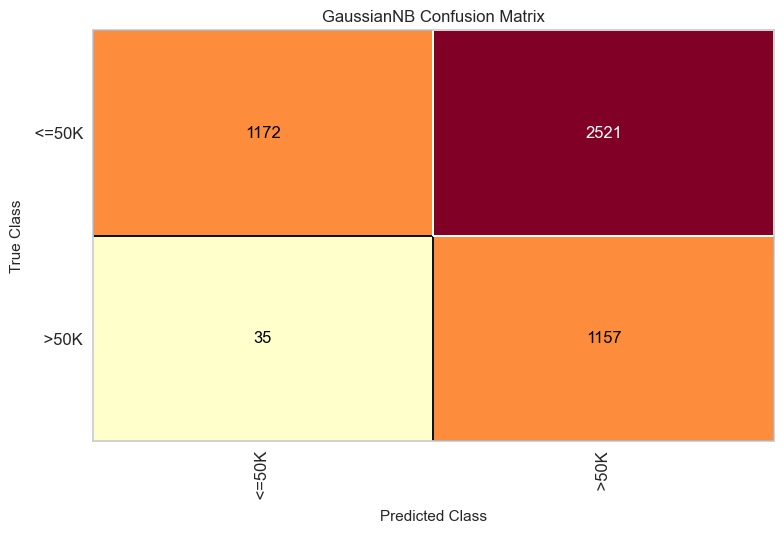

In [13]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_census)
cm.fit(x_census_treinamento, y_census_treinamento)
cm.score(x_census_teste, y_census_teste)
cm.poof("ConfusionMatrixNaiveBayesCensus")

In [14]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



#### Conclusão a partir do algoritmo Naive Bayes

- tivemos muito mais dados da classe <=50K(3693 ) do que da classe >50K(1192);
- O algoritmo identifica 97% dos casos da classe >50K , porém tem a precisão de apenas 31% encima desses encontrados;
- O algoitmo identifica 32% dos casos da classe <=50K, porém tem a precisão de 97% encima desses encontrados.